载入boston house price数据

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3) #将打印浮点数的精度设为小数点后3位
boston = pd.read_csv('boston_housing_m.csv')
boston_cols = boston.columns
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD1,TAX1,PTRATIO1,B1,LSTAT1,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,0.0,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,0.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD1',
       'TAX1', 'PTRATIO1', 'B1', 'LSTAT1', 'MEDV'],
      dtype='object')

In [3]:
bostonmtrx = boston.as_matrix()
print(bostonmtrx.shape)
selected_x_cols = [-4]
x = bostonmtrx[:, selected_x_cols]
y = bostonmtrx[:, -1]
cols = boston_cols[selected_x_cols + [-1]]
print(x.shape, y.shape, cols)

(506, 14)
(506, 1) (506,) Index(['PTRATIO1', 'MEDV'], dtype='object')


target 是1d数组，取出前三个查看, 即y[[0,1,2]]
data 是2d数组，维度不变，取出前三个查看

In [4]:
print(y[:3]) 
print(x[:3, :])

[ 24.   21.6  34.7]
[[ 15.3]
 [ 17.8]
 [ 17.8]]


(2,)


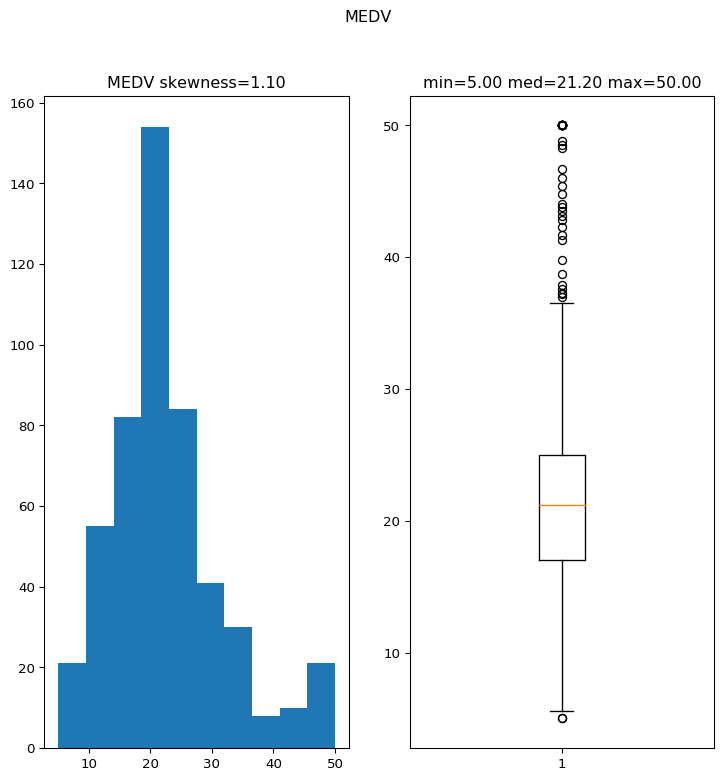

In [5]:
from scipy.stats import skew
import matplotlib.pyplot as plt
fig, axar = plt.subplots(nrows=1, ncols=2, figsize=(9,9), dpi=96)
print(axar.shape)
axar[0].hist(y)
axar[1].boxplot(y)
axar[0].set_title('%s skewness=%.2f' % (cols[-1], skew(y)))
axar[1].set_title('min=%.2f med=%.2f max=%.2f' % (np.min(y), np.median(y), np.max(y)))
fig.suptitle(cols[-1])
plt.show()
plt.clf()

[[0 1]]
0 0 1


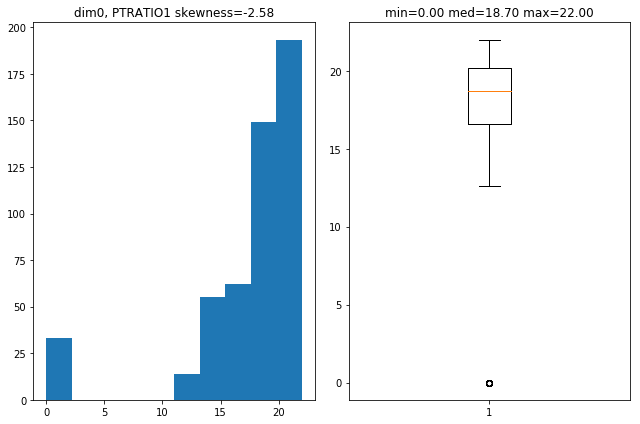

In [6]:
def simplot(x,y,cols):
    plot_idx_ = np.arange(x.shape[1] * 2).reshape(x.shape[1],2)
    print(plot_idx_)
    from scipy.stats import skew
    plt.clf()
    fig = plt.figure(figsize=(9,6))
    for i, p in enumerate(plot_idx_):
        p1, p2 = p
        print(i, p1, p2)
        ax0 = fig.add_subplot(x.shape[1], 2, p1 + 1)  #starts from 1 instead of 0
        ax1 = fig.add_subplot(x.shape[1], 2, p2 + 1)
        x_col = x[:, i]
        ax0.hist(x_col)
        ax1.boxplot(x_col)
        skewness = skew(x_col)
        name = cols[i]
        ax0.set_title('dim%i, %s skewness=%.2f' % (i, name, skewness))
        ax1.set_title('min=%.2f med=%.2f max=%.2f' % (np.min(x_col), np.median(x_col), np.max(x_col)))
    plt.tight_layout()
    plt.show()
simplot(x,y,cols)

w of the linear function is 
[-0.528]
b of the linear function is 32.02
x_0 dot w_0 + b = 23.09, model output of x_0 is 23.09
MSE by sklearn: 82.04
MSE by me: 82.04
MSE(negative) CV=5 : [ -38.12   -88.654 -148.154  -98.282  -78.553], mean=-90.35


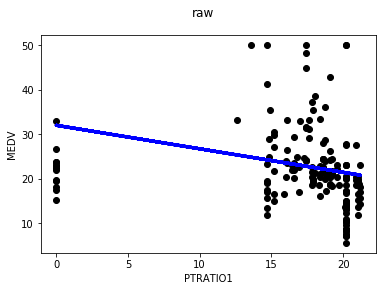

In [7]:
def testreg(x,y, cols, title=''):
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    curx = x
    cury = y

    x_train, x_test, y_train, y_test = train_test_split(curx, cury, test_size=0.33, random_state=0)
    lreg = LinearRegression() # 创建线性回归对象
    lreg.fit(x_train, y_train) # 使用训练集训练模型
    y_pred = lreg.predict(x_test) # 使用模型预测测试集
    print('w of the linear function is \n%s' % lreg.coef_)
    print('b of the linear function is %0.2f' % lreg.intercept_)
    y_pred0 = np.dot(x_test[0], lreg.coef_) + lreg.intercept_
    print('x_0 dot w_0 + b = %0.2f, model output of x_0 is %0.2f' % (y_pred0, y_pred[0]))
    # 比对测试集和预测的测试集
    # mean squared error:
    print("MSE by sklearn: %0.2f" % mean_squared_error(y_test, y_pred))
    print("MSE by me: %0.2f" % np.mean(np.power([y_test - y_pred], 2)))
    cvscore = cross_val_score(lreg, curx, cury, cv=5, scoring='neg_mean_squared_error')
    np.random.seed(42) # keep each random run consistent
    print("MSE(negative) CV=5 : %s, mean=%0.2f" % (cvscore, np.mean(cvscore)))
    plt.clf()
    # Plot outputs
    fig0 = plt.figure()
    plt.suptitle(title)
    ax = fig0.add_subplot(111)
    ax.scatter(x_test, y_test,  color='black')
    ax.plot(x_test, y_pred, color='blue', linewidth=3)
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[-1])
    plt.show()
testreg(x,y,cols,'raw')

[[0 1]]
0 0 1


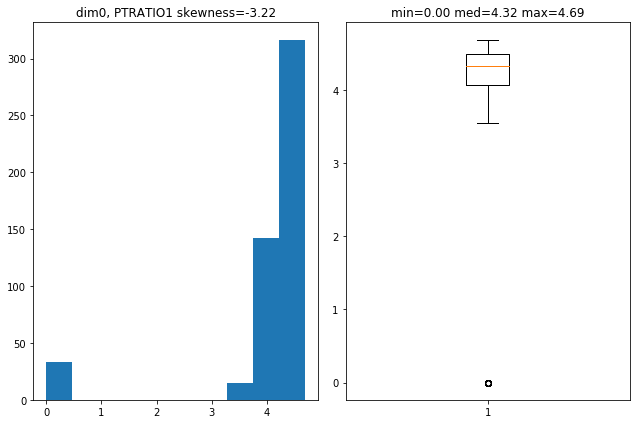

(506, 1) (506, 1)
w of the linear function is 
[-1.525]
b of the linear function is 28.98
x_0 dot w_0 + b = 22.71, model output of x_0 is 22.71
MSE by sklearn: 82.13
MSE by me: 82.13
MSE(negative) CV=5 : [ -36.278  -93.271 -156.833  -98.038  -86.212], mean=-94.13


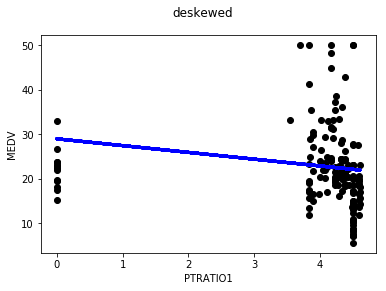

In [8]:
from scipy import stats
new_x = []
plt.clf()
fig2 = plt.figure(figsize=(9, 9), dpi=96)
for dim in range(x.shape[1]):
    x_col = x[:,dim]
    skewness = skew(x_col)
    xt = x_col
    if np.abs(skewness) >= 0.5:
        #xt = np.log1p(x_col)
        xt = np.sqrt(x_col)
    new_x.append(xt)
x_deskewed = np.vstack(new_x).T
simplot(x_deskewed,y,cols)
print(x.shape, x_deskewed.shape)
testreg(x_deskewed,y,cols,'deskewed')

[[0 1]]
0 0 1


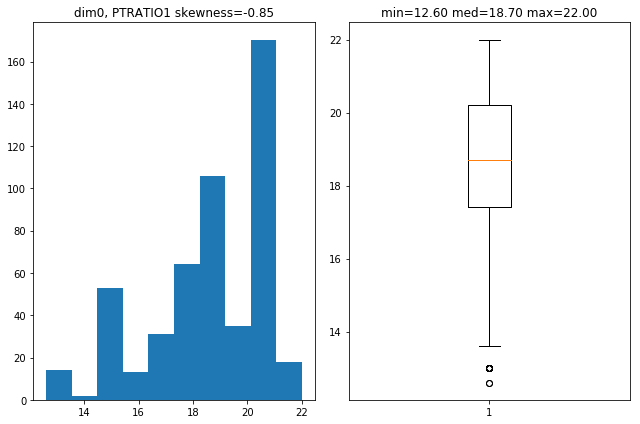

min values of x: [ 0.] [ 12.6]
w of the linear function is 
[-2.377]
b of the linear function is 66.81
x_0 dot w_0 + b = 26.64, model output of x_0 is 26.64
MSE by sklearn: 70.16
MSE by me: 70.16
MSE(negative) CV=5 : [-35.118 -95.324 -94.143 -85.022 -43.929], mean=-70.71


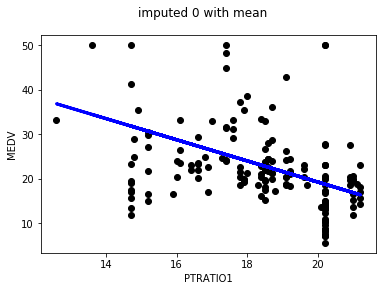

In [9]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0,  strategy="mean", axis=0)
x_imp = imp.fit(x).transform(x)
simplot(x_imp,y,cols)
print('min values of x: %s %s'%(np.min(x, axis=0), np.min(x_imp, axis=0)))
testreg(x_imp,y,cols,'imputed 0 with mean')

[[0 1]]
0 0 1


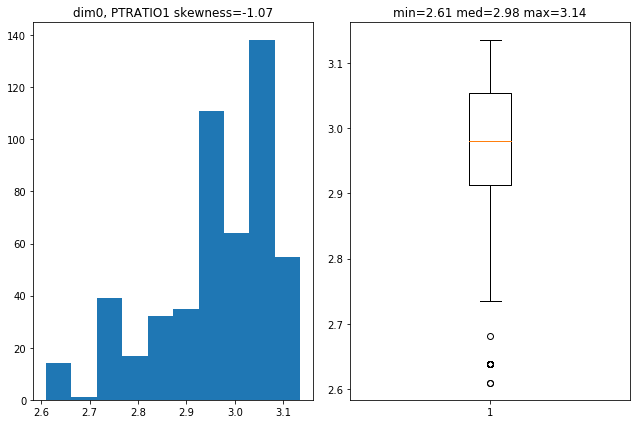

(506, 1) (506, 1)
w of the linear function is 
[-43.136]
b of the linear function is 150.68
x_0 dot w_0 + b = 26.24, model output of x_0 is 26.24
MSE by sklearn: 70.51
MSE by me: 70.51
MSE(negative) CV=5 : [-35.296 -96.435 -94.22  -84.766 -45.153], mean=-71.17


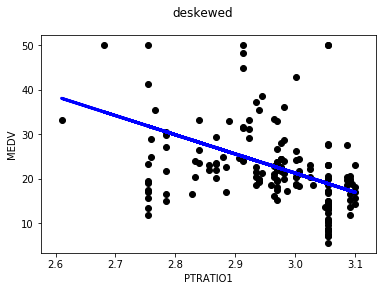

In [10]:
from scipy import stats
new_x_imp = []
plt.clf()
fig2 = plt.figure(figsize=(9, 9), dpi=96)
for dim in range(x.shape[1]):
    x_col = x_imp[:,dim]
    skewness = skew(x_col)
    xt = x_col
    if np.abs(skewness) >= 0.5:
        xt = np.log1p(x_col)
        #xt = np.sqrt(x_col)
    new_x_imp.append(xt)
x_deskewed_imp = np.vstack(new_x_imp).T
simplot(x_deskewed_imp,y,cols)
print(x.shape, x_deskewed_imp.shape)
testreg(x_deskewed_imp,y,cols,'deskewed')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
ridge = Ridge() 
ridge.fit(x_train, y_train) # train the model using the training sets and test with testing sets
y_pred = ridge.predict(x_test)
print('w of the linear function is \n%s' % ridge.coef_)
print('b of the linear function is %0.2f' % ridge.intercept_)
y_pred0 = np.dot(x_test[0], ridge.coef_) + ridge.intercept_
print('x_0 dot w_0 + b = %0.2f, model output of x_0 is %0.2f' % (y_pred0, y_pred[0]))
# mean squared error:
print("MSE: %0.2f" % np.mean(np.power([y_test - y_pred], 2)))

w of the linear function is 
[-0.528]
b of the linear function is 32.02
x_0 dot w_0 + b = 23.09, model output of x_0 is 23.09
MSE: 82.04


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
lreg = LinearRegression() # create linear regression object
lreg.fit(x_train, y_train) # train the model using the training sets and test with testing sets
y_pred = lreg.predict(x_test)
print('w of the linear function is \n%s' % lreg.coef_)
print('b of the linear function is %0.2f' % lreg.intercept_)

w of the linear function is 
[-0.528]
b of the linear function is 32.02


In [17]:
y_pred0 = np.dot(x_test[0], lreg.coef_) + lreg.intercept_
print('x_0 dot w_0 + b = %0.2f, model output of x_0 is %0.2f' % (y_pred0, y_pred[0]))

x_0 dot w_0 + b = 23.09, model output of x_0 is 23.09


In [18]:
# mean squared error:
from sklearn.metrics import mean_squared_error
print("MSE: %0.2f" % np.mean(np.power([y_test - y_pred], 2)))
print("MSE: %0.2f" % mean_squared_error(y_test, y_pred))
# rmse
print("RMSE: %0.2f" % np.sqrt(np.mean(np.power([y_test - y_pred], 2))))

MSE: 82.04
MSE: 82.04
RMSE: 9.06


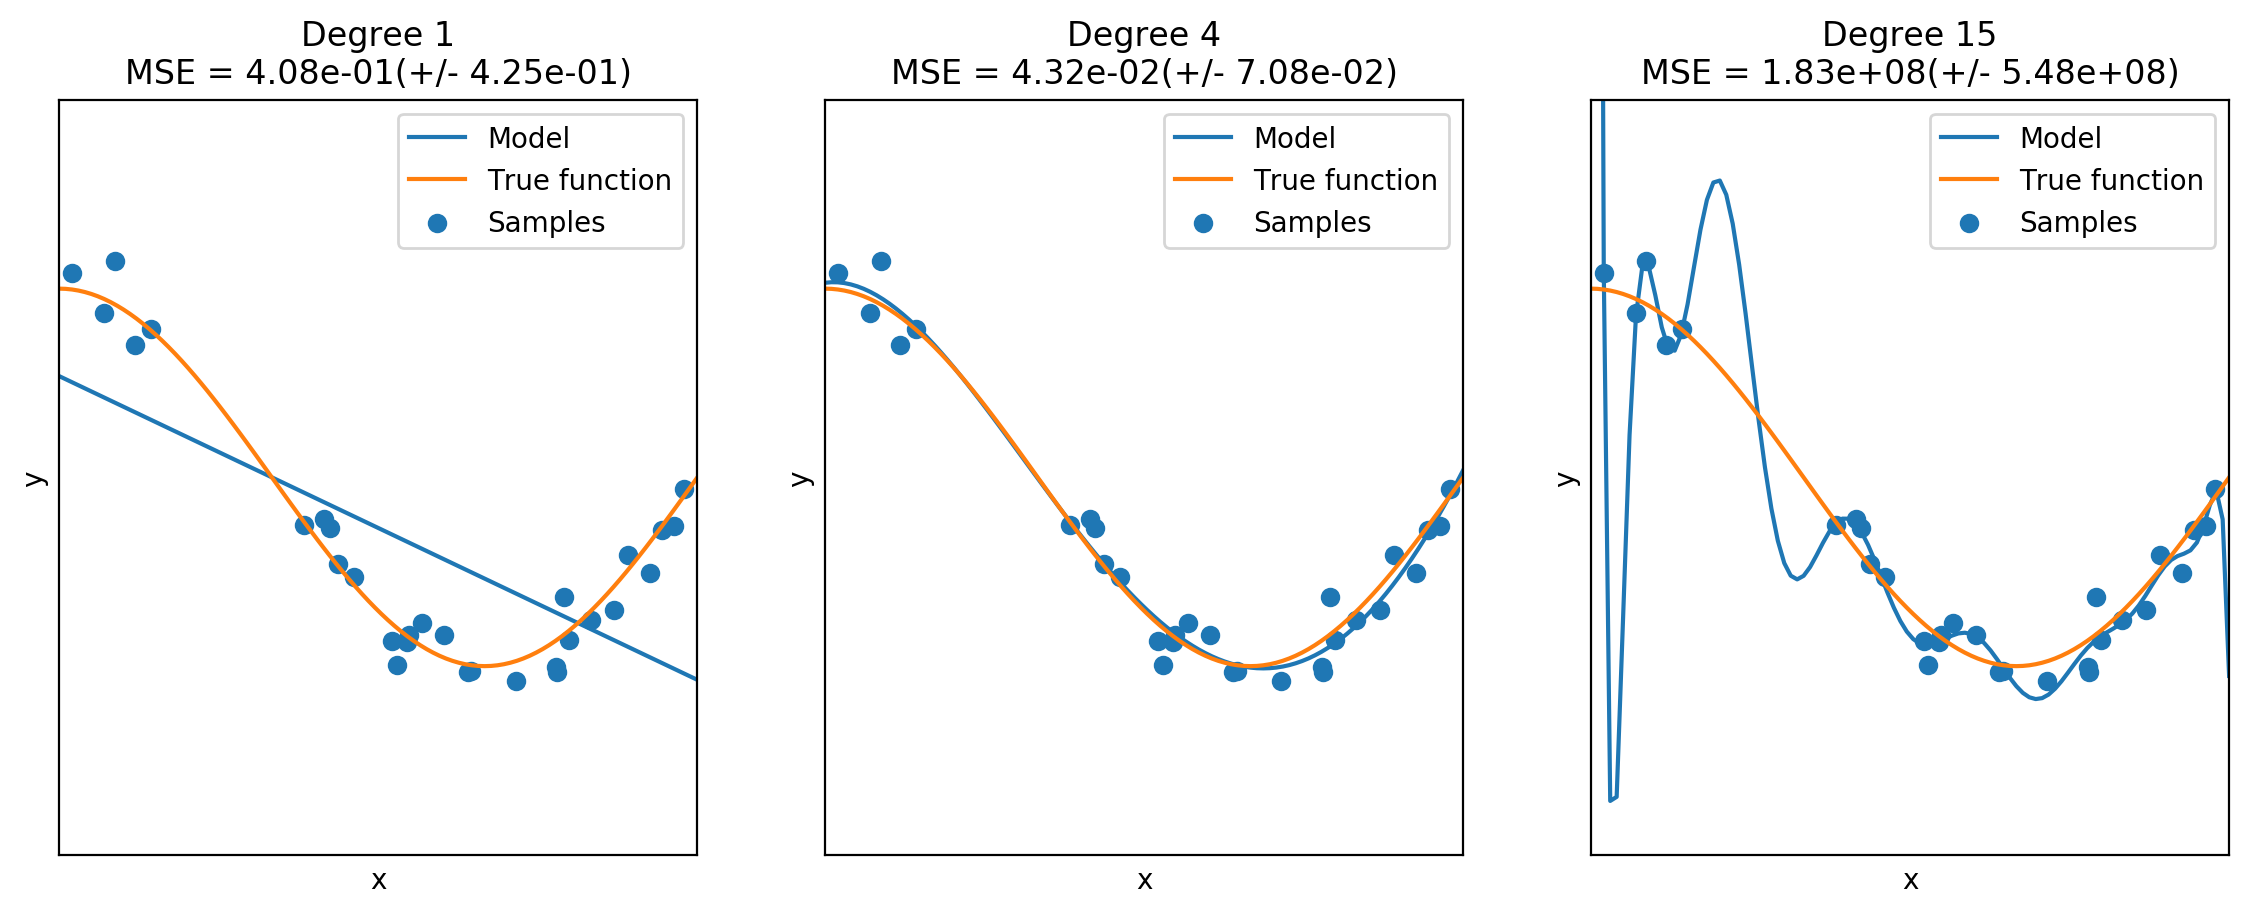

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# plt.figure(figsize=(14, 5), dpi=200)
plt.figure(figsize=(14, 5), dpi=200)
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()